## Starting Off

Run the cell of code below which imports a json file and then loads it into python. Investigate the resulting `data` variable and learn all you can abou the object. 


In [66]:
import json
f = open('output.json')
data = json.load(f)

In [74]:
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?country=SE&offset=0&limit=20',
  'items': [{'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2RdwBSPQiwcmiDo9kixcl8'},
      'href': 'https://api.spotify.com/v1/artists/2RdwBSPQiwcmiDo9kixcl8',
      'id': '2RdwBSPQiwcmiDo9kixcl8',
      'name': 'Pharrell Williams',
      'type': 'artist',
      'uri': 'spotify:artist:2RdwBSPQiwcmiDo9kixcl8'}],
    'available_markets': ['AD',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'EC',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IS',
     'IT',
     'JP',
     'LI',
     'LT',
     'LU',
     'LV',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     'NZ',
    

In [67]:
data.keys()

dict_keys(['albums'])

In [68]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [69]:
data['albums']['items'][1].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'type', 'uri'])

In [70]:
new_dict={'a':1,'b':2,} #NOTE: can't have trailing commas in json

In [71]:
new_dict.values()

dict_values([1, 2])

In [72]:
json.dumps(new_dict) #NOTE: json needs double quotes

'{"a": 1, "b": 2}'

In [73]:
json.dumps({'a':None}) #NOTE: json's missing value is null

'{"a": null}'

# Using APIs and JSON Data

## Objectives
You will be able to:
* Access and manipulate data inside a JSON file
* Pull data from an API and parse/transform the data

## Agenda

* Review JSON Schemas
* Introduce APIs.
* Walk through how to make an API request. 
* Practice making API requests and Parsing the data.


### What is the difference between a JSON and a python dictionary?

## Loading the JSON file

As before, we begin by importing the json package, opening a file with python's built in function, and then loading that data in.

In [9]:
import json
f = open('output.json')
data = json.load(f)

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The most granular level of raw data will be individual numbers (float/int) and strings. These in turn will be stored in the equivalent of python lists and dictionaries. Because these can be combined, we'll start exploring by checking the type of our root object, and start mapping out the hierarchy of the json file.

In [10]:
type(data)

dict

In [4]:
data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?country=SE&offset=0&limit=20',
  'items': [{'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2RdwBSPQiwcmiDo9kixcl8'},
      'href': 'https://api.spotify.com/v1/artists/2RdwBSPQiwcmiDo9kixcl8',
      'id': '2RdwBSPQiwcmiDo9kixcl8',
      'name': 'Pharrell Williams',
      'type': 'artist',
      'uri': 'spotify:artist:2RdwBSPQiwcmiDo9kixcl8'}],
    'available_markets': ['AD',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'EC',
     'EE',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IS',
     'IT',
     'JP',
     'LI',
     'LT',
     'LU',
     'LV',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     'NZ',
    

As you can see, in this case, the first level of the hierarchy is a dictionary. Let's explore what keys are within this:

In [11]:
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [12]:
type(data['albums'])

dict

Another dictionary! So thus far, we have a dictionary within a dictionary. Once again, let's investigate what's within this dictionary (JSON calls the equivalent of Python dictionaries Objects.)

In [5]:
data['albums'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 
<img src="json_diagram1.JPG" width=550>

At this point, if we were to continue checking individual data types, we have a lot to go through. To simplify this, let's use a for loop:

In [6]:
for key in data['albums'].keys():
    print(key, type(data['albums'][key]))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


In [19]:
new_dict={'a':1,'b':2, 'c': ['foo',1]} #NOTE: can't have trailing commas in json

In [20]:
for key in new_dict.keys():
    print(key, type(new_dict[key]))

a <class 'int'>
b <class 'int'>
c <class 'list'>


Adding this to our diagram we now have something like this:
<img src="json_diagram2.JPG" width=550>

Normally, you may not draw out the full diagram as done here, but its a useful picture to have in mind, and in complex schemas, can be useful to map out. At this point, you also probably have a good idea of the general structure of the json file. However, there is still the list of items, which we could investigate further:

## What is an API?

**Application Program Interfaces**, or APIs, are commonly used to retrieve data from remote websites. Sites like Reddit, Twitter, and Facebook all offer certain data through their APIs. 

To use an API, you make a request to a remote web server, and retrieve the data you need.

Python with two built-in modules, `urllib` and `urllib2` to handle these requests but these could be very confusing  and the documentation is not clear.

To make these things simpler, one easy-to-use third-party library, known as` Requests`, is what most developers prefer to use it instead or urllib/urllib2. With this library, you can access content like web page headers, form data, files, and parameters via simple Python commands. It also allows you to access the response data in a simple way.

![](logo.png)

Below is how you would install and import the requests library before making any requests. 
```python
# Uncomment and install requests if you dont have it already
# !pip install requests

# Import requests to working environment
import requests
```

In [23]:
import requests



## The `.get()` Method

Now we have requests library ready in our working environment, we can start making some requests using the `.get()` method as shown below:


We can use a simple GET request to retrieve information from the OpenNotify API.




OpenNotify has several API endpoints. An endpoint is a server route that is used to retrieve different data from the API. For example, the /comments endpoint on the Reddit API might retrieve information about comments, whereas the /users endpoint might retrieve data about users. To access them, you would add the endpoint to the base url of the API.



In [24]:
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")
# Print the status code of the response.
print(response.status_code)

200


http status code 200 means "OK" https://www.iana.org/assignments/http-status-codes/http-status-codes.xhtml

In [31]:
response.json()

{'timestamp': 1561390854,
 'message': 'success',
 'iss_position': {'longitude': '-132.8030', 'latitude': '44.3258'}}

In [30]:
response.json().keys()

dict_keys(['timestamp', 'message', 'iss_position'])

In [28]:
response.content

b'{"timestamp": 1561390854, "message": "success", "iss_position": {"longitude": "-132.8030", "latitude": "44.3258"}}'


GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination. 
GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination. 

## Status Codes
The request we make may not be always successful. The best way is to check the status code which gets returned with the response. Here is how you would do this. 


In [32]:
# Code here 
response.status_code == requests.codes.ok

True

In [37]:
requests.codes.already_reported

208

So this is a good check to see if our request was successful. Depending on the status of the web server, the access rights of the clients and availibility of requested information. A web server may return a number of status codes within the response. Wikipedia has an exhaustive details on all these codes. [Check them out here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

### Common status codes

* 200 — everything went okay, and the result has been returned (if any)
* 301 — the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
* 401 — the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API (we’ll talk about authentication in a later post).
* 400 — the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
* 403 — the resource you’re trying to access is forbidden — you don’t have the right permissions to see it.
* 404 — the resource you tried to access wasn’t found on the server.

### Hitting the right endpoint
iss-pass wasn’t a valid endpoint, so we got a 404 status code in response. We forgot to add `.json` at the end, as the API documentation states.

We’ll now make a GET request to http://api.open-notify.org/iss-pass.json.


## Response Contents
Once we know that our request was successful and we have a valid response, we can check the returned information using `.text` property of the response object. 
```python
print (resp.text)
```

In [38]:
response

<Response [200]>

In [39]:
response = requests.get("http://api.open-notify.org/iss-pass.json")
print(response.status_code)


400


In [40]:
# Code here 
print(response.text)

{
  "message": "failure", 
  "reason": "Latitude must be specified"
}



In [41]:
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=10&lon=20")
print(response.status_code)


200


### Query parameters

If you look at the documentation for the OpenNotify API, we see that the ISS Pass endpoint requires two parameters.

We can do this by adding an optional keyword argument, params, to our request. In this case, there are two parameters we need to pass:

* lat — The latitude of the location we want.
* lon — The longitude of the location we want.
We can make a dictionary with these parameters, and then pass them into the requests.get function.

We can also do the same thing directly by adding the query parameters to the url, like this: http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74.

It’s almost always preferable to setup the parameters as a dictionary, because requests takes care of some things that come up, like properly formatting the query parameters.

We’ll make a request using the coordinates of New York City, and see what response we get.

In [87]:
# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}


# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)


# Print the content of the response (the data the server returned)
print(response.content)
# This gets the same data as the command aboveresponse = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")
print(response.url)
http://api.open-notify.org/iss-pass.json?lat=45.0&lon=-122.3

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1562094005, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 599, \n      "risetime": 1562136167\n    }, \n    {\n      "duration": 637, \n      "risetime": 1562141938\n    }, \n    {\n      "duration": 566, \n      "risetime": 1562147813\n    }, \n    {\n      "duration": 562, \n      "risetime": 1562153679\n    }, \n    {\n      "duration": 633, \n      "risetime": 1562159486\n    }\n  ]\n}\n'
http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74


In [82]:
import os
api = os.environ["WEATHER_KEY"]
api

KeyError: 'WEATHER_KEY'

In [84]:
# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of New York City.
parameters = {"latitude": 52.5200, "longitude": 13.4050, "time": 1310702400}


# Make a get request with the parameters.
response = requests.get("https://api.darksky.net/forecast/cd35acf369b55daae38db9a2dd08b546/", params=parameters)


# Print the content of the response (the data the server returned)
print(response.content)
# This gets the same data as the command aboveresponse = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")
print(response.content)


b'{"code":400,"error":"Poorly formatted request"}\n'
b'{"code":400,"error":"Poorly formatted request"}\n'


In [85]:
response.url

'https://api.darksky.net/forecast/cd35acf369b55daae38db9a2dd08b546?latitude=52.52&longitude=13.405&time=1310702400'

In [77]:
json.loads(response.content)

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1562089270,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 599, 'risetime': 1562136167},
  {'duration': 637, 'risetime': 1562141938},
  {'duration': 566, 'risetime': 1562147813},
  {'duration': 562, 'risetime': 1562153679},
  {'duration': 633, 'risetime': 1562159486}]}

So this returns a lot of information which by default is not really human understandable due to data encoding, HTML tags and other styling information that only a web browser can truly translate. In later lessons we shall look at how we can use ** Regular Exprerssions**  to clean this information and extract the required bits and pieces for analysis. 

## Response Headers
The response of an HTTP request can contain many headers that holds different bits of information. We can use `.header` property of the response object to access the header information as shown below:


In [46]:
# Code here 
dict(response.headers)

{'Server': 'nginx/1.10.3',
 'Date': 'Mon, 24 Jun 2019 16:02:10 GMT',
 'Content-Type': 'application/json',
 'Content-Length': '452',
 'Connection': 'keep-alive',
 'Via': '1.1 vegur'}

The content of the headers is our required element. You can see the key-value pairs holding various pieces of  information about the resource and request. Let's try to parse some of these values using the requests library:

```python

print(resp.headers['Content-Length'])  # length of the response
print(resp.headers['Date'])  # Date the response was sent
print(resp.headers['server'])   # Server type (google web service - GWS)


In [79]:
print(response.headers['Content-Length'])  # length of the response
print(response.headers['Date'])  # Date the response was sent
print(response.headers['server'])   # Server type (google web service - GWS)

519
Tue, 02 Jul 2019 18:21:00 GMT
nginx/1.10.3


## HTTP POST method 

Sometimes we need to send one or more files simultaneously to the server. For example, if a user is submitting a form and the form includes different fields for uploading files, like user profile picture, user resume, etc. Requests can handle multiple files on a single request. This can be achieved by putting the files to a list of tuples in the form (`field_name, file_info)`.

```python
import requests

url = 'http://httpbin.org/post'  
file_list = [  
    ('image', ('fi.png', open('fi.png', 'rb'), 'image/png')),
    ('image', ('fi2.jpeg', open('fi2.jpeg', 'rb'), 'image/png'))
]

r = requests.post(url, files=file_list)  
print(r.text)  
```

{
  "args": {}, 
  "data": "", 
  "files": {
    "image": ""
  }, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "40790", 
    "Content-Type": "multipart/form-data; boundary=e17b0acc93215c0392b10fbcce19ef40", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "65.207.79.74, 65.207.79.74", 
  "url": "https://httpbin.org/post"
}


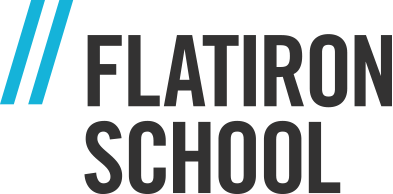

In [48]:
import requests

url = 'http://httpbin.org/post'
file_list = [
('image', ('fi.png', open('fi.png', 'rb'), 'image/png')), ('image', ('fi2.jpeg', open('fi2.jpeg', 'rb'), 'image/png')) ]

r = requests.post(url, files=file_list)
print(r.text)



![](quota.png)


## Generating Access Tokens

As discussed, in order to use many APIs, one needs to use OAuth which requires an access token. As such, our first step will be to generate this login information so that we can start making some requests.  

With that, lets go grab an access token from an API site and make some API calls!
Point your browser over to this [yelp page](https://www.yelp.com/developers/v3/manage_app) and start creating an app in order to obtain and api access token:


![](./images/yelp_app.png)

You can either sign in to an existing Yelp account, or create a new one, if needed.

On the page you see above, simply fill out some sample information such as "Flatiron Edu API Example" for the app name, or whatever floats your boat. Afterwards, you should be presented with an API key that you can use to make requests!

With that, it's time to start making some api calls!

In [55]:
#As a general rule of thumb, don't store passwords in a main file like this!
#Instead, you would normally store those passwords under a sub file like passwords.py which you would then import.
#Or even better, as an environment variable that could then be imported!
#For now, we'll simply hardcode them into our notebook for simplicity.
client_id = 'bVX1Jsfp4dkIOqw5HOVplg' #Your client ID goes here (as a string)
api_key = 'RTzp-q-TgkJW_NFQogubFvZNRDziXyoR38VbtZMWibDI-FlvB25OE7GmafFEqhTL8_Bk2HlcX24-hRWLMP7Nc6WHO_VXMXldpPBjP0LoPv5EFFELMSI2oll8njhbXHYx' #Your api key goes here (as a string)

In [51]:
!source /Users/ptw/Yelp_Secret

/Users/ptw/Yelp_Secret: line 1: client_id: command not found
/Users/ptw/Yelp_Secret: line 2: api_key: command not found


## An Example Request with OAuth <a id="oauth_request"></a>
https://www.yelp.com/developers/documentation/v3/get_started

In the next lesson, we'll further dissect how to read and translate online documentation like the link here. For now, let's simply look at an example request and dissect it into its consituent parts:

In [88]:
terms = ['Mexican','Italian','Chinese']
location = 'Astoria NY'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }
for term in terms:
    url_params = {
                    'term': term.replace(' ', '+'),
                    'location': location.replace(' ', '+'),
                    'limit': SEARCH_LIMIT
                }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])

<Response [200]>
<class 'str'>
{"businesses": [{"id": "yj9vVa08ABH6BBOLHMfJag", "alias": "bund-on-broadway-astoria", "name": "Bund On Broadway", "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/-gsBu63NhkT4GhUPWK0O1Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/bund-on-broadway-astoria?adjust_creative=bVX1Jsfp4dkIOqw5HOVplg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=bVX1Jsfp4dkIOqw5HOVplg", "review_count": 85, "categories": [{"alias": "shanghainese", "title": "Shanghainese"}, {"alias": "noodles", "title": "Noodles"}], "rating": 4.0, "coordinates": {"latitude": 40.7631578922095, "longitude": -73.9282292}, "transactions": ["pickup", "delivery"], "location": {"address1": "25-08 Broadway", "address2": "", "address3": null, "city": "Astoria", "zip_code": "11106", "country": "US", "state": "NY", "display_address": ["25-08 Broadway", "Astoria, NY 11106"]}, "phone": "+17189715465", "display_phone": "(718) 971-5465", "distance": 655.9894769392454}

In [89]:
response.headers

{'Server': 'nginx', 'Content-Type': 'application/json', 'RateLimit-DailyLimit': '5000', 'RateLimit-Remaining': '5000', 'RateLimit-ResetTime': '2019-07-03T00:00:00+00:00', 'X-Zipkin-Id': '14bd1bb8addb0e86', 'X-B3-Sampled': '0', 'Content-Encoding': 'gzip', 'X-Proxied': '10-65-211-19-useast1cprod', 'Transfer-Encoding': 'chunked', 'Accept-Ranges': 'bytes', 'Date': 'Tue, 02 Jul 2019 19:07:12 GMT', 'Via': '1.1 varnish', 'Connection': 'keep-alive', 'X-Served-By': 'cache-dca17744-DCA', 'X-Cache': 'MISS', 'X-Cache-Hits': '0'}

## Breaking Down the Request

As you can see, there are three main parts to our request.  
  
They are:
* The url
* The header
* The parameters
  
The url is fairly straightforward and is simply the base url as described in the documentation (again more details in the upcoming lesson).

The header is a dictionary of key-value pairs. In this case, we are using a fairly standard header used by many APIs. It has a strict form where 'Authorization' is the key and 'Bearer YourApiKey' is the value.

The parameters are the filters which we wish to pass into the query. These will be embedded into the url when the request is made to the api. Similar to the header, they form key-value pairs. Valid key parameters by which to structure your queries, are described in the API documentation which we'll look at further shortly. A final important note however, is the need to replace spaces with "+". This is standard to many requests as URLs cannot contain spaces. (Note that the header itself isn't directly embedded into the url itself and as such, the space between 'Bearer' and YourApiKey is valid.)


## The Response

As before, our response object has both a status code, as well as the data itself. With that, let's start with a little data exploration!

In [90]:
response.json().keys()


dict_keys(['businesses', 'total', 'region'])

Now let's go a bit further and start to preview what's stored in each of the values for these keys.


In [91]:
for key in response.json().keys():
    print(key)
    value = response.json()[key] #Use standard dictionary formatting
    print(type(value)) #What type is it?
    print('\n\n') #Seperate out data

businesses
<class 'list'>



total
<class 'int'>



region
<class 'dict'>





Let's continue to preview these further to get a little better acquainted.


In [93]:
yelp_data =response.json()
yelp_data['businesses'][:]



[{'id': 'yj9vVa08ABH6BBOLHMfJag',
  'alias': 'bund-on-broadway-astoria',
  'name': 'Bund On Broadway',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/-gsBu63NhkT4GhUPWK0O1Q/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/bund-on-broadway-astoria?adjust_creative=bVX1Jsfp4dkIOqw5HOVplg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=bVX1Jsfp4dkIOqw5HOVplg',
  'review_count': 85,
  'categories': [{'alias': 'shanghainese', 'title': 'Shanghainese'},
   {'alias': 'noodles', 'title': 'Noodles'}],
  'rating': 4.0,
  'coordinates': {'latitude': 40.7631578922095, 'longitude': -73.9282292},
  'transactions': ['pickup', 'delivery'],
  'location': {'address1': '25-08 Broadway',
   'address2': '',
   'address3': None,
   'city': 'Astoria',
   'zip_code': '11106',
   'country': 'US',
   'state': 'NY',
   'display_address': ['25-08 Broadway', 'Astoria, NY 11106']},
  'phone': '+17189715465',
  'display_phone': '(718) 971-5465',
  'distance': 655.98947693

As you can see, we're primarily interested in the 'bussinesses' entry. 


## Summary <a id="sum"></a>

Congratulations! We've covered a lot here! We took some of your previous knowledge with HTTP requests and OAuth in order to leverage an enterprise API! Then we made some requests to retrieve information that came back as a json format. We then transformed this data into a dataframe using the Pandas package. In the next lab, we'll break down how to read API documentation and then put it all together to make a nifty map!